In [3]:
import pickle

In [4]:
x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [5]:
x

array([[[[  7,  12,  10],
         [  8,  11,   2],
         [ 20,  24,  29],
         ...,
         [ 79,  60,  52],
         [ 83,  58,  48],
         [ 99,  69,  54]],

        [[  7,  12,  10],
         [ 12,  15,   6],
         [ 18,  22,  27],
         ...,
         [ 89,  61,  51],
         [ 94,  62,  49],
         [103,  71,  58]],

        [[ 10,  15,  13],
         [ 12,  15,   6],
         [ 15,  19,  24],
         ...,
         [ 87,  61,  47],
         [ 83,  59,  41],
         [103,  72,  62]],

        ...,

        [[158, 141, 137],
         [100,  91,  88],
         [110, 109, 109],
         ...,
         [139, 125, 119],
         [208, 193, 184],
         [217, 197, 179]],

        [[113, 105, 108],
         [106, 101, 103],
         [109, 104, 105],
         ...,
         [ 98,  86,  86],
         [ 95,  86,  83],
         [176, 159, 153]],

        [[122, 110, 112],
         [115, 106, 109],
         [113, 106, 111],
         ...,
         [110, 100,  92],
        

In [6]:
y

array([1, 1, 0, ..., 1, 1, 0])

In [7]:
# Normalizing 'x' data
x = x/255

In [8]:
# After Normalization "x" data
x

array([[[[0.02745098, 0.04705882, 0.03921569],
         [0.03137255, 0.04313725, 0.00784314],
         [0.07843137, 0.09411765, 0.11372549],
         ...,
         [0.30980392, 0.23529412, 0.20392157],
         [0.3254902 , 0.22745098, 0.18823529],
         [0.38823529, 0.27058824, 0.21176471]],

        [[0.02745098, 0.04705882, 0.03921569],
         [0.04705882, 0.05882353, 0.02352941],
         [0.07058824, 0.08627451, 0.10588235],
         ...,
         [0.34901961, 0.23921569, 0.2       ],
         [0.36862745, 0.24313725, 0.19215686],
         [0.40392157, 0.27843137, 0.22745098]],

        [[0.03921569, 0.05882353, 0.05098039],
         [0.04705882, 0.05882353, 0.02352941],
         [0.05882353, 0.0745098 , 0.09411765],
         ...,
         [0.34117647, 0.23921569, 0.18431373],
         [0.3254902 , 0.23137255, 0.16078431],
         [0.40392157, 0.28235294, 0.24313725]],

        ...,

        [[0.61960784, 0.55294118, 0.5372549 ],
         [0.39215686, 0.35686275, 0.34509804]

In [9]:
x.shape

(23000, 100, 100, 3)

In [10]:
y.shape

(23000,)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization, Dropout

In [12]:
# Designing the Model
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\Syeds\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Syeds\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Fitting the Model

history = model.fit(x, y, epochs = 5, validation_split = 0.1, batch_size = 64)

Epoch 1/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 149s 446ms/step - accuracy: 0.5704 - loss: 0.6700 - val_accuracy: 0.7091 - val_loss: 0.5551
Epoch 2/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 108s 333ms/step - accuracy: 0.7496 - loss: 0.5083 - val_accuracy: 0.7909 - val_loss: 0.4482
Epoch 3/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 111s 341ms/step - accuracy: 0.7956 - loss: 0.4367 - val_accuracy: 0.7770 - val_loss: 0.4645
Epoch 4/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 116s 356ms/step - accuracy: 0.8245 - loss: 0.3910 - val_accuracy: 0.8226 - val_loss: 0.3861
Epoch 5/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 141s 434ms/step - accuracy: 0.8496 - loss: 0.3403 - val_accuracy: 0.8287 - val_loss: 0.3850


In [15]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

In [16]:
X_sample = np.loadtxt('input_test.csv', delimiter = ',')

In [17]:
Y_sample = np.loadtxt('labels_test.csv', delimiter = ',')

In [18]:
print("Shape of X_sample:", X_sample.shape)
print("Shape of Y_sample:", Y_sample.shape)

Shape of X_sample: (400, 30000)
Shape of Y_sample: (400,)


In [19]:
X_sample = X_sample.reshape(len(X_sample), 100, 100, 3)
Y_sample = Y_sample.reshape(len(Y_sample), 1)


In [20]:
X_sample[1,:]

array([[[223., 211., 163.],
        [223., 209., 160.],
        [244., 228., 179.],
        ...,
        [252., 253., 255.],
        [254., 255., 255.],
        [245., 246., 250.]],

       [[255., 246., 206.],
        [254., 241., 199.],
        [255., 251., 206.],
        ...,
        [252., 252., 250.],
        [255., 255., 253.],
        [255., 255., 253.]],

       [[255., 249., 222.],
        [254., 243., 213.],
        [255., 246., 212.],
        ...,
        [241., 239., 227.],
        [165., 163., 151.],
        [145., 143., 131.]],

       ...,

       [[136., 131., 128.],
        [174., 170., 167.],
        [181., 177., 176.],
        ...,
        [ 47.,  50.,  55.],
        [ 46.,  49.,  56.],
        [ 47.,  50.,  57.]],

       [[173., 165., 162.],
        [182., 177., 174.],
        [167., 162., 159.],
        ...,
        [ 70.,  74.,  77.],
        [ 70.,  73.,  78.],
        [ 70.,  73.,  78.]],

       [[141., 133., 130.],
        [133., 125., 122.],
        [121., 1

In [21]:
X_sample = X_sample/255
X_sample[0]

array([[[0.4627451 , 0.32156863, 0.37647059],
        [0.42745098, 0.27843137, 0.32156863],
        [0.45490196, 0.30196078, 0.30588235],
        ...,
        [0.66666667, 0.5254902 , 0.39215686],
        [0.64705882, 0.50588235, 0.36470588],
        [0.63921569, 0.49803922, 0.35686275]],

       [[0.37254902, 0.24313725, 0.28627451],
        [0.40784314, 0.27058824, 0.29803922],
        [0.43137255, 0.29411765, 0.28627451],
        ...,
        [0.68235294, 0.54117647, 0.4       ],
        [0.66666667, 0.5254902 , 0.38431373],
        [0.65490196, 0.51764706, 0.36862745]],

       [[0.69411765, 0.58039216, 0.6       ],
        [0.70980392, 0.59215686, 0.6       ],
        [0.67843137, 0.55686275, 0.5372549 ],
        ...,
        [0.68627451, 0.55294118, 0.40392157],
        [0.67058824, 0.5372549 , 0.38823529],
        [0.65882353, 0.52941176, 0.36862745]],

       ...,

       [[0.24705882, 0.23529412, 0.30196078],
        [0.25490196, 0.25098039, 0.31372549],
        [0.25490196, 0

In [22]:
model.evaluate(X_sample, Y_sample)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.1629 - loss: 1.9806


[1.7712548971176147, 0.21250000596046448]

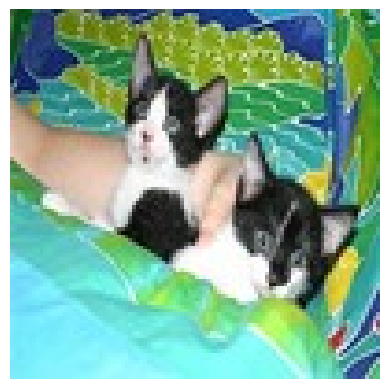

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Our Model says it is a: CAT


In [118]:
idx= random.randint(0, len(Y_sample)-1)
plt.imshow(X_sample[idx,:])
plt.axis('off')
plt.show()

Y_predict = model.predict(X_sample[idx,:].reshape(1, 100, 100,3))
Y_predict = (Y_predict < 0.5).astype(int)

if (Y_predict == 0).all():
    pred = 'DOG'
else:
    pred = 'CAT'
print("Our Model says it is a:", pred)


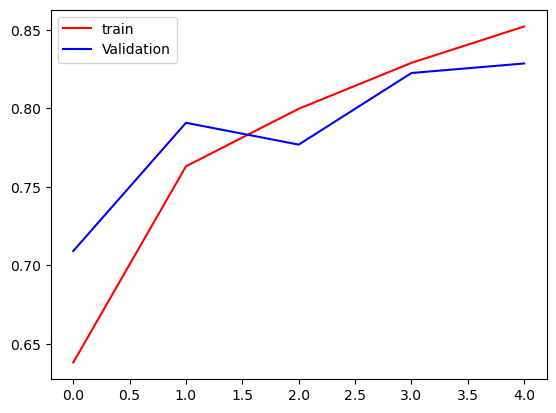

In [24]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.legend()
plt.show()


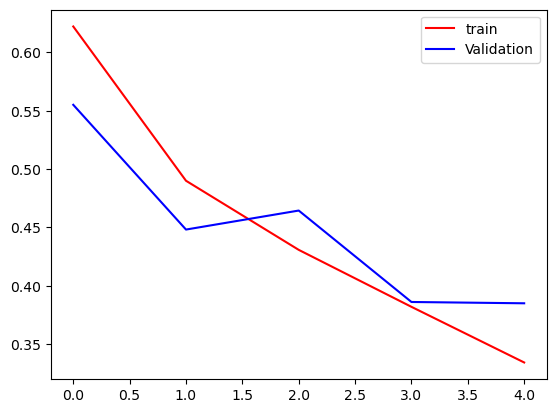

In [25]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.legend()
plt.show()


In [26]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\Syeds\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Syeds\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 98, 98, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 47, 47, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 895,873 (3.42 MB)

 Trainable params: 895,489 (3.42 MB)

 Non-trainable params: 384 (1.50 KB)

In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(x, y, epochs = 5, validation_split = 0.1, batch_size = 64)

Epoch 1/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 240s 718ms/step - accuracy: 0.6472 - loss: 0.8280 - val_accuracy: 0.6030 - val_loss: 0.7919
Epoch 2/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 231s 712ms/step - accuracy: 0.7725 - loss: 0.4793 - val_accuracy: 0.7365 - val_loss: 0.5120
Epoch 3/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 781s 551ms/step - accuracy: 0.8281 - loss: 0.3836 - val_accuracy: 0.7983 - val_loss: 0.4516
Epoch 4/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 173s 533ms/step - accuracy: 0.8724 - loss: 0.3017 - val_accuracy: 0.7857 - val_loss: 0.4705
Epoch 5/5
324/324 ━━━━━━━━━━━━━━━━━━━━ 212s 652ms/step - accuracy: 0.9022 - loss: 0.2370 - val_accuracy: 0.7126 - val_loss: 1.0100


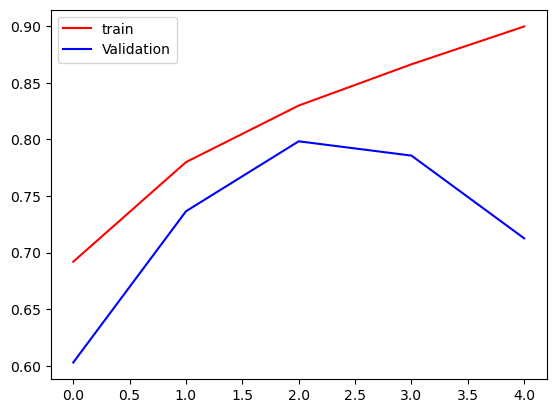

In [30]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation')
plt.legend()
plt.show()

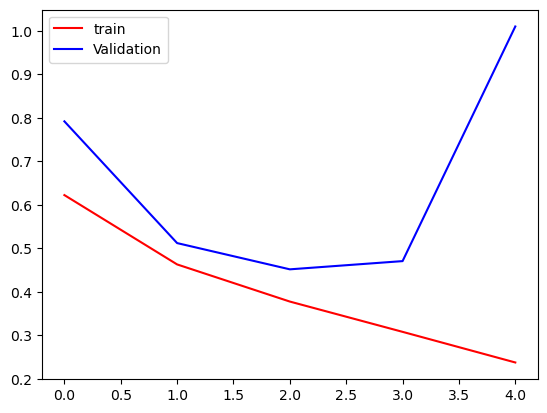

In [31]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation')
plt.legend()
plt.show()

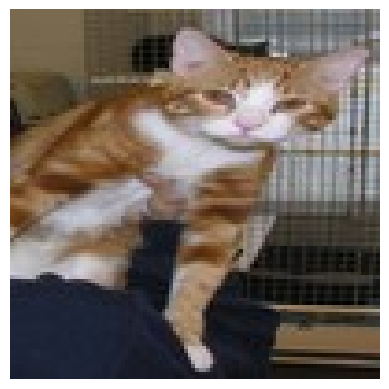

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Our Model says it is a: CAT


In [92]:
idx2= random.randint(0, len(Y_sample)-1)
plt.imshow(X_sample[idx2,:])
plt.axis('off')
plt.show()

Y_predict2 = model.predict(X_sample[idx2,:].reshape(1, 100, 100,3))
Y_predict2 = (Y_predict2 < 0.5).astype(int)

if (Y_predict2 == 0).all():
    pred = 'DOG'
else:
    pred = 'CAT'
print("Our Model says it is a:", pred)


In [33]:
val_accuracy = history.history['val_accuracy']
print(val_accuracy)

[0.6030434966087341, 0.7365217208862305, 0.7982608675956726, 0.7856521606445312, 0.7126086950302124]


In [34]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


In [35]:
print("Training and Validation Accuracy for each epoch:")
for epoch in range(len(train_accuracy)):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Accuracy: {train_accuracy[epoch] * 100:.2f}%")
    print(f"  Validation Accuracy: {val_accuracy[epoch] * 100:.2f}%")


Training and Validation Accuracy for each epoch:
Epoch 1:
  Training Accuracy: 69.20%
  Validation Accuracy: 60.30%
Epoch 2:
  Training Accuracy: 77.99%
  Validation Accuracy: 73.65%
Epoch 3:
  Training Accuracy: 82.98%
  Validation Accuracy: 79.83%
Epoch 4:
  Training Accuracy: 86.62%
  Validation Accuracy: 78.57%
Epoch 5:
  Training Accuracy: 89.96%
  Validation Accuracy: 71.26%


In [36]:
for epoch, accuracy in enumerate(val_accuracy, start=1):
    print(f"Epoch {epoch}: Validation Accuracy = {accuracy * 100:.2f}%")


Epoch 1: Validation Accuracy = 60.30%
Epoch 2: Validation Accuracy = 73.65%
Epoch 3: Validation Accuracy = 79.83%
Epoch 4: Validation Accuracy = 78.57%
Epoch 5: Validation Accuracy = 71.26%
